In [1]:
# !pip install jupyter_black
# import jupyter_black
# jupyter_black.load()

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

## Задача 1: Попарные углы

Даны набор векторов. Без использования циклов в Python найдите номера двух различных векторов, угол между которыми - минимален. Максимум 3 строки, соответсвующие форматированию jupyter_black.

In [2]:
# 10 векторов в R^4
x = np.array(
    [
        [-1.05247805, 0.0813231, 0.94708268, -0.53371674],
        [0.01359646, -1.43838044, 1.01326978, -0.38062482],
        [0.30563645, 1.18997822, 0.48149476, 0.83524308],
        [1.22609704, 1.72169283, -0.21137761, -1.21598295],
        [0.6397264, -1.24751009, 0.03137696, 0.55576899],
        [1.55630085, 1.2840827, -0.52525765, 2.4523538],
        [-1.70632707, 0.45006017, -1.04214031, -1.47674443],
        [-0.51870141, -0.01755243, 1.95102122, 0.36809772],
        [-0.97629927, 0.35430853, -0.63895086, -0.2467184],
        [-0.51120513, -0.33014789, -1.45017724, -0.02398285],
    ]
)

Посчитаем матрицу углов между векторами из стандартной формулы
\begin{align}
ab = |a||b|cos(\alpha) =>\\
=> \alpha = arccos\left(\frac{ab}{|a||b|}\right)
\end{align}
Для этого считаем скалярное произведение с помощью **np.dot**
и нормы векторов **np.linalg.norm**.
**np.argmax** ищет максимальное значение косинуса, т.е. минимальное значение угла, **np.unravel_index** - переводит np индекс в двумерный.

In [3]:
norms = np.linalg.norm(x, axis=1)
cosine_sim = np.dot(x, x.T) / (norms[:, None] * norms)
i, j = np.unravel_index(np.argmax(np.triu(cosine_sim, 1)), cosine_sim.shape)

assert (i, j) == (6, 8) or (i, j) == (8, 6), "Wrong Answer"
i, j

(6, 8)

## Задача 2: Cвертка
Реализуйте двумерную свертку при помощи numpy без использования циклов в python. 
Максимум 4 строки,  соответсвующие форматированию jupyter_black.

![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)



In [4]:
from numpy.lib.stride_tricks import sliding_window_view

x = np.arange(64).reshape((8, 8))
kernel = np.array([[1, -1, 2], [3, -2, 1], [0, 0, 1]])

# x0, x1, k0, k1 = (
#     x.shape[0] - kernel.shape[0] + 1,
#     x.shape[1] - kernel.shape[1] + 1,
#     *kernel.shape,
# )
# strided_x = np.lib.stride_tricks.as_strided(
#     x, shape=(x0, x1, k0, k1), strides=x.strides * 2
# )
# x = np.einsum("ijkl,kl->ij", strided_x, kernel)


ans = np.array(
    [
        [37, 42, 47, 52, 57, 62],
        [77, 82, 87, 92, 97, 102],
        [117, 122, 127, 132, 137, 142],
        [157, 162, 167, 172, 177, 182],
        [197, 202, 207, 212, 217, 222],
        [237, 242, 247, 252, 257, 262],
    ]
)
# assert (x == ans).all(), "Wrong answer"
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

## Задача 3: Брахистохрона

В классе мы находили брахистохрону через параметризацию соответсвующей дуги циклоиды. Ключевым здесь было то, что мы заранее знали, в каком виде искать ответ, что, к сожалению, далеко не всегда случается в реальной жизни. В этой задаче вам нужно будет построить кусочно-динейное приближение брахистохроны, не пользуясь явными формулами для ее формы. Другими словами, напишите функционал, который под данным высотам точек вычисляет время спуска, -- и минимизируйте этот функционал средствами scipy.

In [5]:
HEIGHT = 13
WIDTH = 37
NUM_POINTS = 50
dx = WIDTH / (NUM_POINTS - 1)
xs = np.linspace(0, WIDTH, NUM_POINTS)


# Правильный ответ для сравнения
def cycl(theta):
    return (1 - np.cos(theta)) / (theta - np.sin(theta)) - HEIGHT / WIDTH


theta = optimize.root(cycl, (0.001, 2 * np.pi)).x[0]
r = HEIGHT / (1 - np.cos(theta))
ts = np.linspace(0, theta, 1000)
sol_xs = r * (ts - np.sin(ts))
sol_ys = HEIGHT - r * (1 - np.cos(ts))

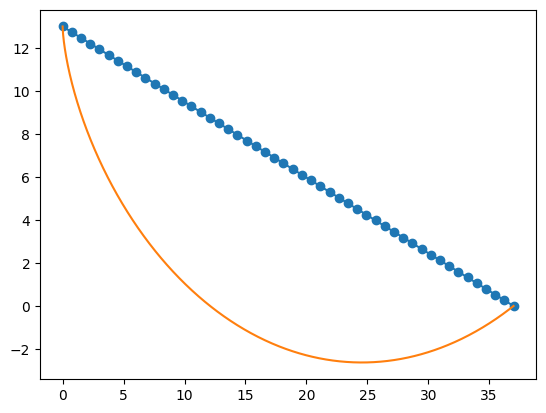

In [6]:
# Функция для отрисовки
def draw(ys):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xs, ys, marker="o")
    ax.plot(sol_xs, sol_ys)
    plt.show()


# Инициализируем горку прямой
ys = np.linspace(HEIGHT, 0, NUM_POINTS)
draw(ys)

In [7]:
# Функция для вычисления времени спуска
def get_time(ys):
    g = 9.81
    total_time = 0
    for i in range(1, ys.shape[0]):
        dx = xs[i] - xs[i - 1]
        dy = ys[i] - ys[i - 1]
        ds = np.sqrt(dx**2 + dy**2)
        # Находим время спуска, используя закон сохранения энергии
        total_time += ds / (
            np.sqrt(2 * g * (HEIGHT - ys[i])) + np.sqrt(2 * g * (HEIGHT - ys[i - 1]))
        )
    return total_time

In [8]:
# Условие: не двигаем первую и последнюю точки
bounds = (
    [(HEIGHT, HEIGHT)]
    + [(-float("inf"), float("inf")) for _ in range(NUM_POINTS - 2)]
    + [(0, 0)]
)

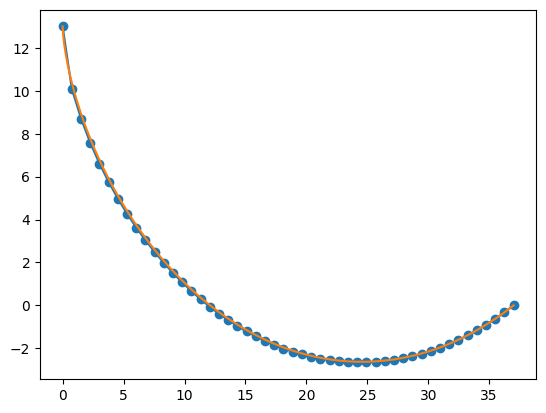

Время движения по оптимизированной траектории: 1.7827363650285293


In [9]:
# Запуск оптимизации
result = optimize.minimize(get_time, ys, bounds=bounds)

draw(result.x)
print("Время движения по оптимизированной траектории:", get_time(result.x))